**Processamento Digital de Imagens - 2022/01**<br/>
**Engenharia da Computação**<br/>
**Aluno:** Gabriel Soares Baptista, 2018102117<br/>

### Questão 2

In [18]:
import numpy as np
import matplotlib.pyplot as plt

### Funções auxiliares

In [19]:
def image_plot(image: np.array, size: Tuple[int, int], scaled: bool = False) -> None:
    """ Plota a imagem com as informações passadas """
    plt.figure(figsize=size)
    if not scaled:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

### Resolução

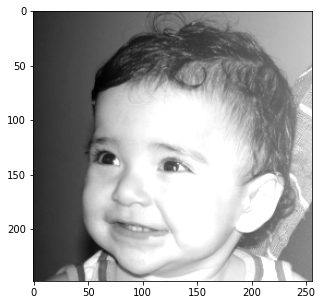

In [86]:
from PIL import Image
image = np.array(Image.open('../images/image.png').convert('L'), dtype=np.double)
# image = np.array(Image.open('../images/homomorfica.png').convert('L'), dtype=np.double)
image_plot(image, (5, 6))

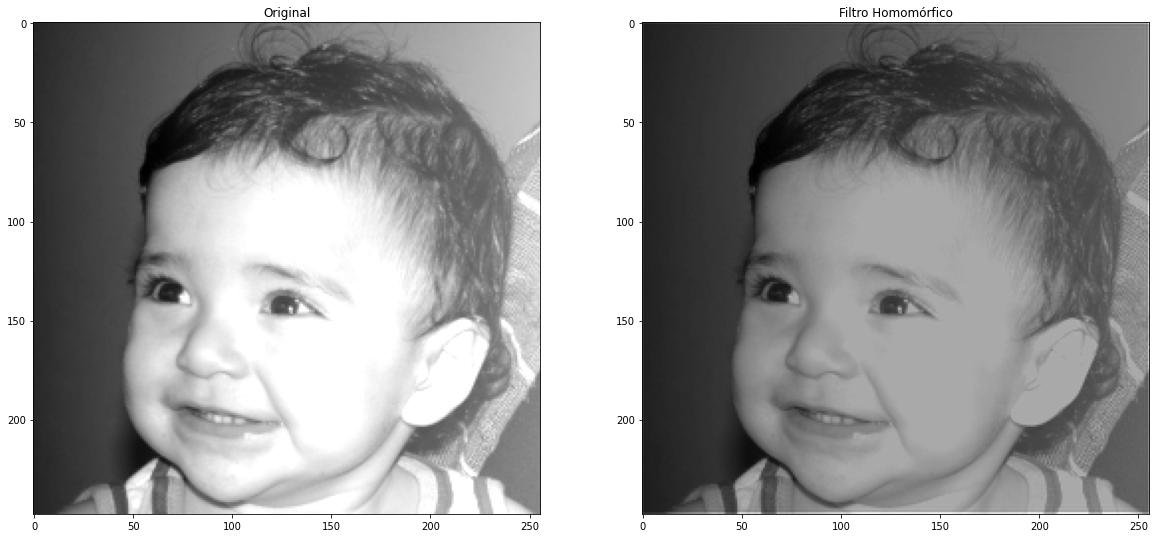

In [92]:
im2 = np.log(image + 0.01)
im_fill = np.zeros((2*im2.shape[0], 2*im2.shape[1]))
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))

y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1) 
u, v = np.meshgrid(x, y)
D = np.sqrt(u**2 + v**2)

c = 1
d0 = 320
yh = 1.4
yl = 0.8

H = (yh - yl)*(1 - np.exp(-c*(D**2/d0**2))) + yl

# Filtragem Homomórfico 
G_homomorfico = F_shift*H
im_homomorfico_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_homomorfico)))
im_homomorfico = im_homomorfico_fill[0:im2.shape[0],0:im2.shape[1]]
im_homomorfico = np.exp(im_homomorfico)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20)) 
axs[0].imshow(image,cmap='gray')
axs[1].imshow(im_homomorfico,cmap='gray') 
axs[0].set_title('Original')
axs[1].set_title('Filtro Homomórfico')
plt.show()

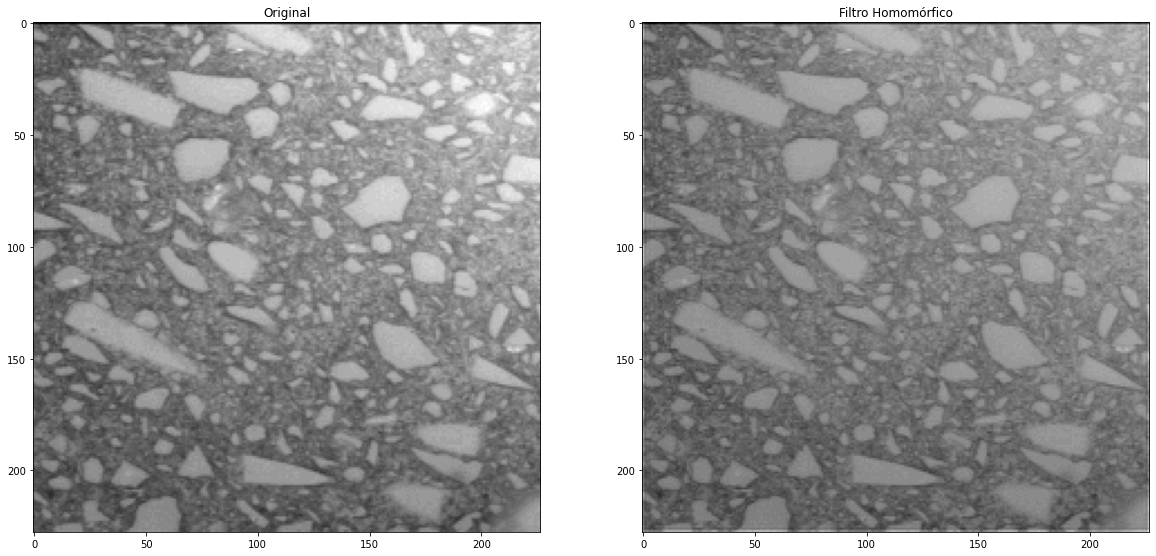

In [82]:
from PIL import Image
image = np.array(Image.open('../images/mar-il.gif').convert('L'))

im2 = np.log(image)
im_fill = np.zeros((2*im2.shape[0], 2*im2.shape[1]))
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))

y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1) 
u, v = np.meshgrid(x, y)
D = np.sqrt(u**2 + v**2)

c = 2
d0 = 1000
yh = 2.5
yl = 0.5

H = (yh - yl)*(1 - np.exp(-c*(D**2/d0**2))) + yl

# Filtragem Homomórfico 
G_homomorfico = F_shift*H
im_homomorfico_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_homomorfico)))
im_homomorfico = im_homomorfico_fill[0:im2.shape[0],0:im2.shape[1]]
im_homomorfico = np.exp(im_homomorfico)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20)) 
axs[0].imshow(image,cmap='gray')
axs[1].imshow(im_homomorfico,cmap='gray') 
axs[0].set_title('Original')
axs[1].set_title('Filtro Homomórfico')
plt.show()